# Logistic Regression

## 1. Introduction


Logistic regression is a classification algorithm used to predict binary outcomes.
In this notebook, we’ll use logistic regression to predict survival on the Titanic
dataset, based on features like passenger class, age, gender, and fare.



## 2. Data Preparation

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


data = pd.read_csv('/Users/stitchbleu/577_Project/Data/train.csv')
data.info()
data.head()

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
y = data['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Logistic regression uses the sigmoid function to map predictions to probabilities
between 0 and 1, which can be interpreted as class probabilities. The model
parameters are optimized by maximizing the likelihood function.

## 3. Logistic Regression

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(model)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(model)
        return [1 if i > 0.5 else 0 for i in y_pred]

# Train
model_gd = LogisticRegressionGD(learning_rate=0.01, epochs=1000)
model_gd.train(X_train.to_numpy(), y_train.to_numpy())


## 4. Application

In [18]:
from sklearn.linear_model import LogisticRegression

model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

y_pred_gd = model_gd.predict(X_test.to_numpy())
y_pred_sklearn = model_sklearn.predict(X_test)


## 5. Evaluation

Custom Logistic Regression Model Accuracy: 0.659217877094972
Scikit-Learn Logistic Regression Model Accuracy: 0.8100558659217877


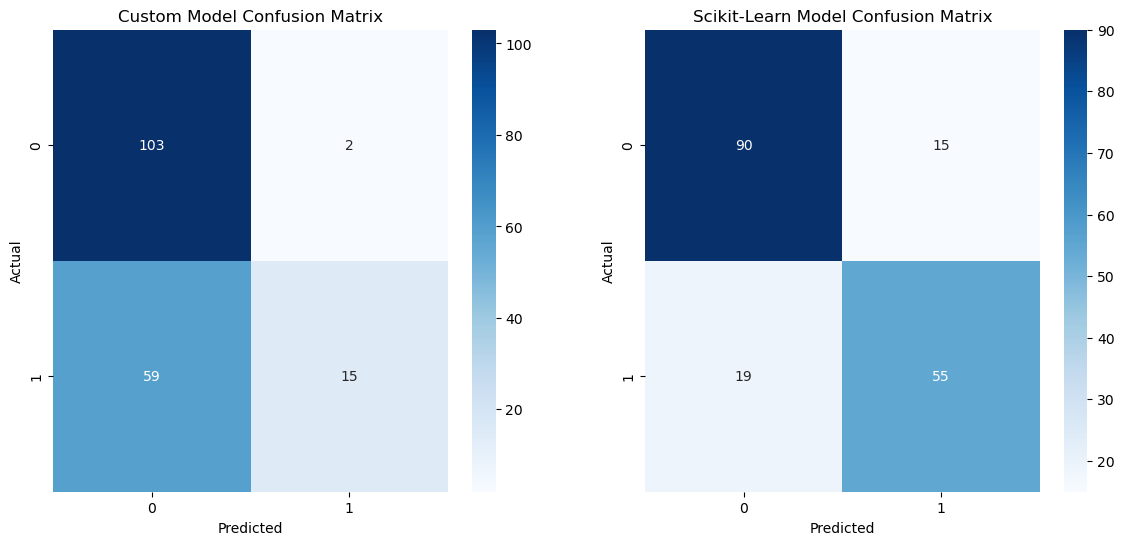

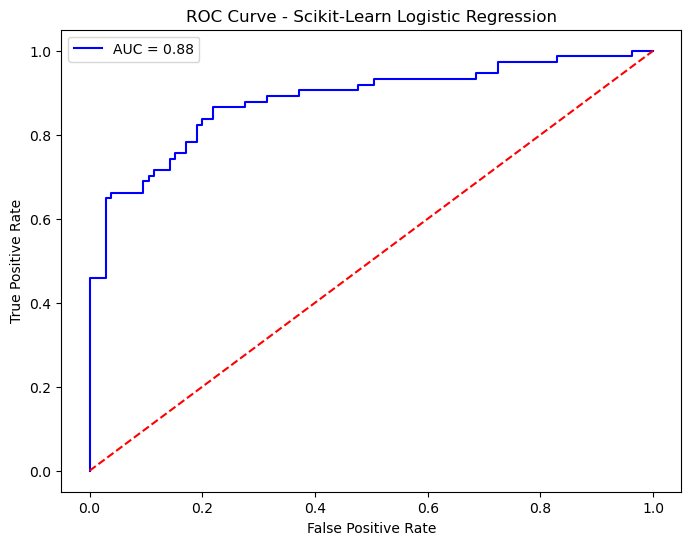

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

accuracy_gd = accuracy_score(y_test, y_pred_gd)
print("Custom Logistic Regression Model Accuracy:", accuracy_gd)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Scikit-Learn Logistic Regression Model Accuracy:", accuracy_sklearn)

conf_matrix_gd = confusion_matrix(y_test, y_pred_gd)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_gd, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Custom Model Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Scikit-Learn Model Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

# ROC Curve 
y_prob = model_sklearn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Scikit-Learn Logistic Regression")
plt.legend()
plt.show()


Both custom and Scikit-Learn logistic regression models show similar performance in predicting
survival on the Titanic dataset, with the Scikit-Learn model being more robust and easier to
implement. The ROC curve and confusion matrix indicate that the model performs reasonably well
in classifying passengers as survivors or non-survivors. This application of logistic regression
demonstrates the power of this algorithm in binary classification tasks.

## 6. Learning Curve
Learning curve helps diagnose underfitting (both curves low) or overfitting (training accuracy much higher than validation). It provides insights into model performance improvements as more data is added.

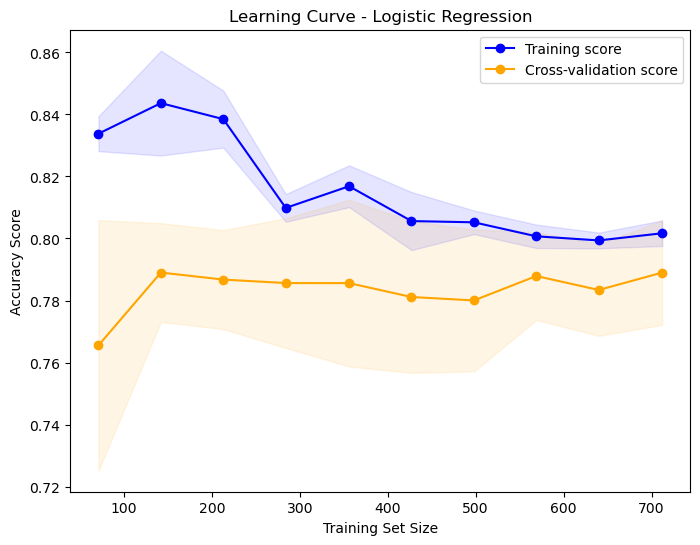

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_sklearn, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and sd 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - Logistic Regression")
plt.legend(loc="best")
plt.show()


## Logistic Learning Curve
This logistic learning curve demonstrates the model’s decision boundary and how it interprets a continuous feature for classification, providing a clear view of how logistic regression models probabilities.

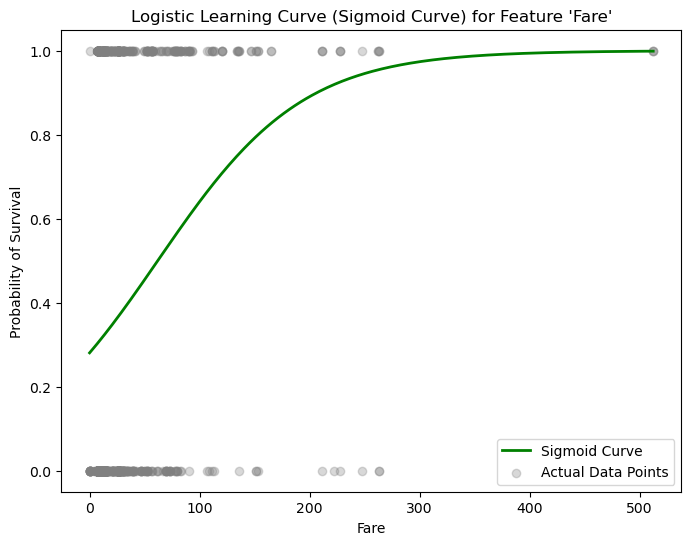

In [34]:
X_single_feature = X[['Fare']].values
y_target = y.values

model_single_feature = LogisticRegression()
model_single_feature.fit(X_single_feature, y_target)

X_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 300).reshape(-1, 1)
y_prob = model_single_feature.predict_proba(X_range)[:, 1]  

plt.figure(figsize=(8, 6))
plt.plot(X_range, y_prob, color='green', linewidth=2)
plt.scatter(X_single_feature, y_target, alpha=0.3, color='gray', label="Actual Data Points")
plt.xlabel("Fare")
plt.ylabel("Probability of Survival")
plt.title("Logistic Learning Curve (Sigmoid Curve) for Feature 'Fare'")
plt.legend(["Sigmoid Curve", "Actual Data Points"])
plt.show()
